# Time SeriesForecasting - Semester End Exam - 100 marks

In [3]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.8 MB 2.6 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.8 MB 2.7 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.8 MB 2.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.8 MB 2.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.8 MB 2.9 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.8 MB 2.9 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 2.9 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 2.8 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.8 MB 2.9 MB/s eta 0:00:02
   -------------------

In [4]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import matplotlib.dates as mdates
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from   pandas.tseries.offsets          import BDay
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import  qqplot
from statsmodels.tsa.seasonal          import  seasonal_decompose
from   statsmodels.tsa.api             import  ExponentialSmoothing,Holt
from statsmodels.tsa.arima.model       import  ARIMA
from sklearn.metrics                   import  mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools

# Section B Total 40 Marks

### DATA_SET:

- Shampoo Sales Dataset

- Data refers from Jan 2001 to Dec 2003
- This dataset describes the monthly number of sales of shampoo over a 3 year period.
- The units are a sales count and there are 36 observations.

* Month ==	date field ====> First entry in Month column `1-01` indiactes Year 2001-Month 01 etc.
* Sales == 	numeric


### 2.A	Data preparation (10 marks)

#### Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables? (1 MARK)

In [8]:
df=pd.read_csv('Shampoo.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [9]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


#### convert the data into time series (4 MARK)

In [18]:
ts = pd.DataFrame(df['Sales'].values, columns=['Sales'], index=pd.date_range(start='01-01-2001', periods=36, freq='MS'))
ts.head()

,Sales
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [19]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2001-01-01 to 2003-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


#### Check for defects in the data such as missing values, null, etc. (2 MARK)

In [20]:
ts.isnull().sum()

Sales    0
dtype: int64

####  Visualize the time series using relevant plots. (3MARK)

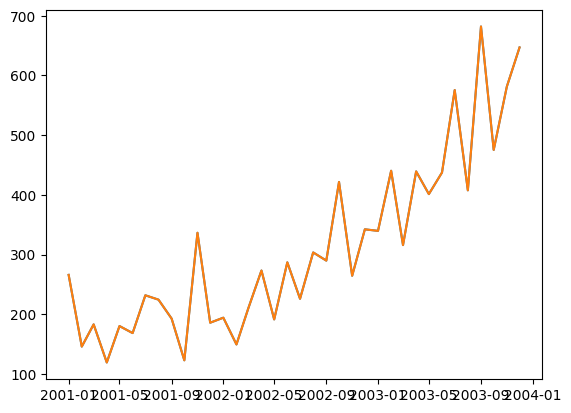

In [22]:
plt.plot(ts)
plt.show()

### 2.B Data Understanding (15 marks) 

#### Decompose the time series and check for components of time series. (5 MARKS)

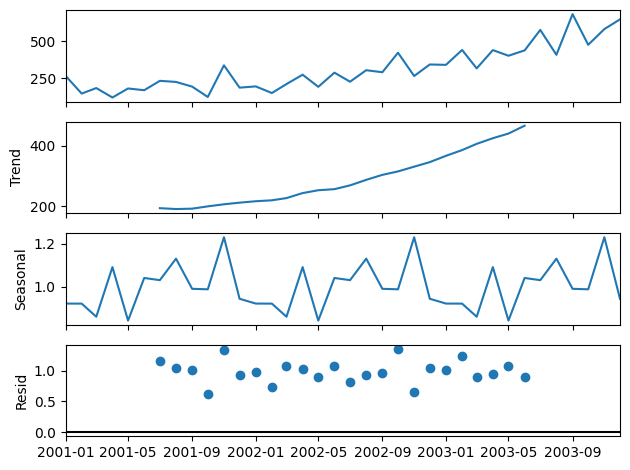

In [26]:
dec = seasonal_decompose(ts, model='multiplicative')
dec.plot()

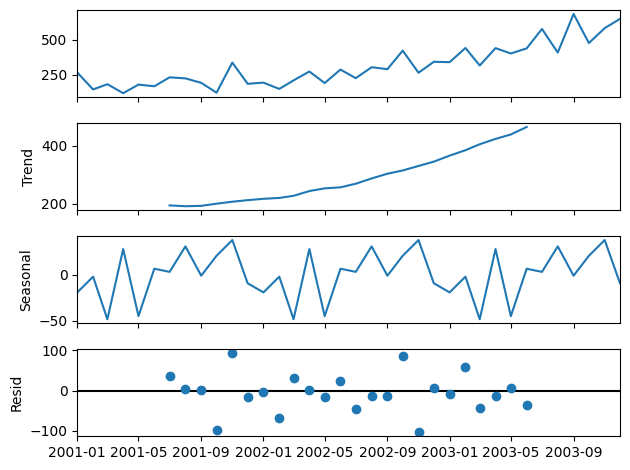

In [27]:
dec = seasonal_decompose(ts, model='additive')
dec.plot()

#### Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary? (5 MARKS)

In [28]:
dful_test = adfuller(ts.values)
print(dful_test)
    

(3.0601420836411815, 1.0, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 278.9972644263031)


In [ ]:
pvalue is 1 much greater than 0.05, hence Failed to reject null hypothesis. The series is non stationary.

In [29]:
ts['Sales'].diff(periods=1)

2001-01-01      NaN
2001-02-01   -120.1
2001-03-01     37.2
2001-04-01    -63.8
2001-05-01     61.0
2001-06-01    -11.8
2001-07-01     63.3
2001-08-01     -7.3
2001-09-01    -31.7
2001-10-01    -69.9
2001-11-01    213.6
2001-12-01   -150.6
2002-01-01      8.4
2002-02-01    -44.8
2002-03-01     60.6
2002-04-01     63.2
2002-05-01    -81.9
2002-06-01     95.6
2002-07-01    -61.0
2002-08-01     77.6
2002-09-01    -13.7
2002-10-01    131.7
2002-11-01   -157.1
2002-12-01     77.8
2003-01-01     -2.6
2003-02-01    100.7
2003-03-01   -124.5
2003-04-01    123.4
2003-05-01    -38.0
2003-06-01     36.1
2003-07-01    138.1
2003-08-01   -167.9
2003-09-01    274.4
2003-10-01   -206.7
2003-11-01    106.0
2003-12-01     65.6
Freq: MS, Name: Sales, dtype: float64

In [31]:
adfuller(ts['Sales'].diff(periods=1).dropna())

(-7.249074055553854,
 1.7998574141687034e-10,
 1,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 275.32503579406307)

In [ ]:
#with first order of differencing, the series is found to be stationary

####  Plot AutoCorrelation and Partial AutoCorrelation function for original series? What is your inference from these plots?  (5 MARKS)

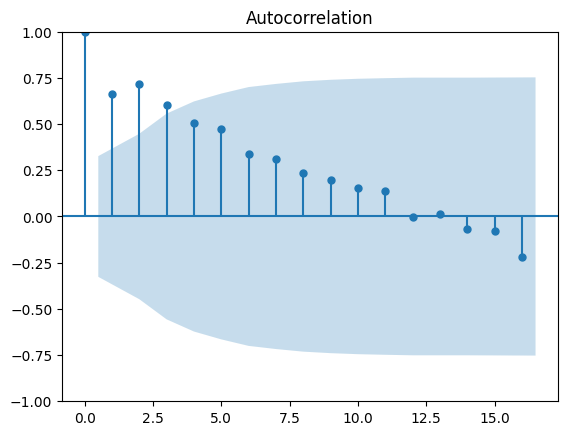

In [32]:
plot_acf(ts.Sales.values)

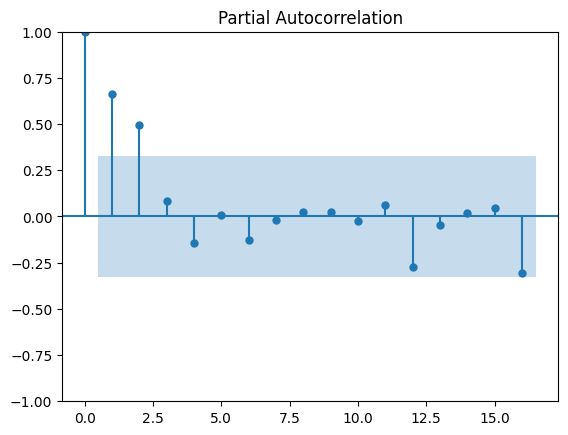

In [33]:
plot_pacf(ts.Sales.values)

### 2.C Model Building (15 marks)

####  Split dataset into 70:30.  (2 marks)

In [36]:
train_len = int(ts.shape[0] * 0.7)

In [51]:
train = ts['01-01-2001': '01-02-2003']
test = ts['01-02-2003':]

#### Fit ARIMA model and observe the RMSE and MAPE values of the model for test data.(13 marks)

In [57]:
ar_mod = ARIMA(train, order=(4,1,6))

In [60]:
ar_mod = ar_mod.fit()

In [62]:
forecaset = ar_mod.forecast(steps=11)

In [66]:
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error

In [65]:
mean_absolute_percentage_error(test, forecaset)

0.26103577128841954

In [67]:
root_mean_squared_error(test, forecaset)

170.51442849008095

In [68]:
ar_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   25
Model:                 ARIMA(4, 1, 6)   Log Likelihood                -128.795
Date:                Wed, 19 Feb 2025   AIC                            279.591
Time:                        14:29:20   BIC                            292.549
Sample:                    01-01-2001   HQIC                           283.029
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9612      1.534     -0.627      0.531      -3.968       2.045
ar.L2         -1.1124      0.604     -1.843      0.065      -2.296       0.071
ar.L3         -0.9658      1.456     -0.663      0.507      -3.819       1.887
ar.L4         -0.9920      0.270     -3.677      0.000      -1.521      -0.463
ma.L1         -0.2063     84.496     -0.002      0.998    -165.814     165.402
ma.L2          0.9858     99.060      0.010      0.992    -193.168     195.139
ma.L3          0.5708      5.727      0.100      0.921     -10.653      11.795
ma.L4          0.9830    101.937      0.010      0.992    -198.810     200.776
ma.L5         -0.2323     83.569     -0.003      0.998    -164.025     163.560
ma.L6          0.9724      0.838      1.161      0.246      -0.670       2.614
sigma2      1726.5448      0.074   2.33e+04      0.000    1726.400    1726.690
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.77   Prob(JB):                         0.71
Heteroskedasticity (H):               0.81   Skew:                            -0.12
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.41e+24. Standard errors may be unstable.
"""

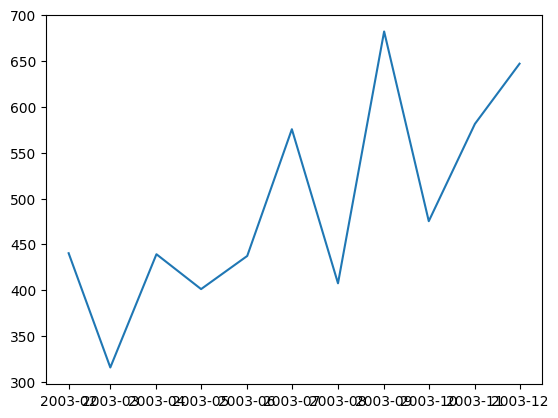

In [104]:
plt.show()

In [131]:
test

,Sales
2003-02-01,440.4
2003-03-01,315.9
2003-04-01,439.3
2003-05-01,401.3
2003-06-01,437.4
2003-07-01,575.5
2003-08-01,407.6
2003-09-01,682.0
2003-10-01,475.3
2003-11-01,581.3


# Section C Total 40 Marks

### 3.A Fit exponential smoothing model and observe the residuals, RMSE and MAPE values of the model for test data. (15 MARKS)

In [97]:
double_exp = ExponentialSmoothing(train)

In [98]:
double_exp = double_exp.fit()

In [99]:
exp_pred = double_exp.forecast(steps=11)

In [100]:
root_mean_squared_error(test, exp_pred)

203.706472017809

In [101]:
mean_absolute_percentage_error(test, exp_pred)

0.3198796258835213

### 3.B.i How would you improve the exponential smoothing model? Make the changes and Fit the final exponential smoothing model. (15 MARKS)

In [159]:
tri_exp = ExponentialSmoothing(train, trend='multiplicative', seasonal='additive',initialization_method='estimated')

In [160]:
tri_exp = tri_exp.fit()

In [161]:
t_exp_pred = tri_exp.forecast(steps=11)

In [162]:
root_mean_squared_error(test, t_exp_pred)

156.05991046655433

In [163]:
mean_absolute_percentage_error(test, t_exp_pred)

0.23678080838109314

### 3.B.ii Analyze the residuals of this final model. Feel free to use charts or graphs to explain. (5 MARKS)

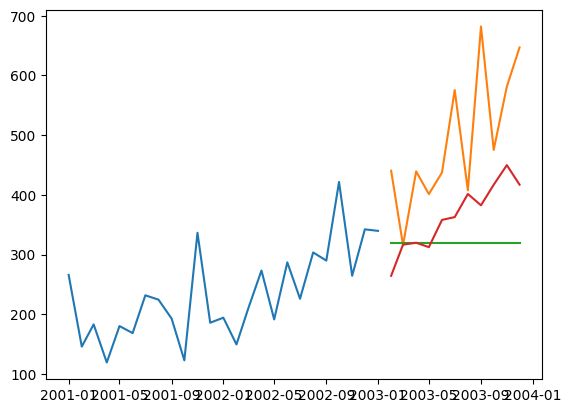

In [164]:
plt.plot(train)
plt.plot(test)
plt.plot(exp_pred)
plt.plot(t_exp_pred)
plt.show()

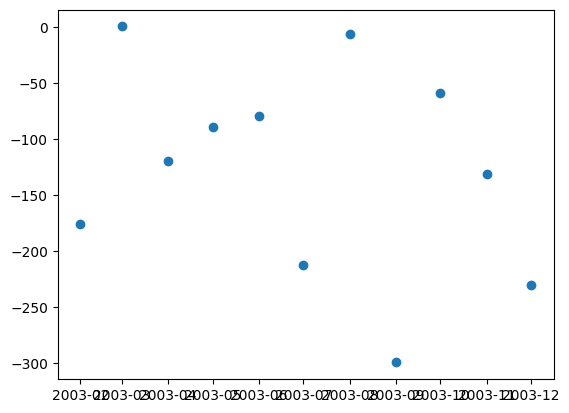

In [165]:
residue = t_exp_pred.values.reshape((11,1))-test.values.reshape((11,1))
plt.scatter(x=t_exp_pred.index, y = residue)
plt.show()

In [166]:
t_exp_pred.values.reshape((11,1))

array([[264.49478665],
       [316.62855906],
       [319.78793565],
       [312.4741042 ],
       [358.02348527],
       [362.7803779 ],
       [401.48106611],
       [382.5256644 ],
       [416.96036944],
       [449.77745062],
       [417.09351012]])

In [167]:
test.values

array([[440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

### 3.C Forecast the Average Spending for next 6 months using the final model? (5 MARKS)

In [168]:
f_mod=  ExponentialSmoothing(ts, trend="multiplicative", seasonal="additive")
f_mod = f_mod.fit()

In [169]:
future = f_mod.forecast(steps=6)

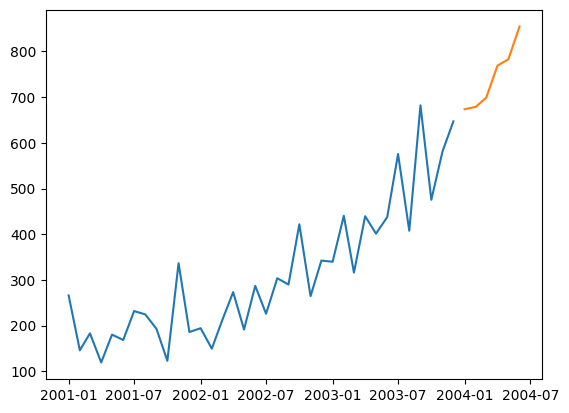

In [170]:
plt.plot(ts)
plt.plot(future)
plt.show()

# END